# Table of Contents
### 1. Importing Libraries & Data
### 2. Create a Histogram of 'order_hour_of_day' column
### 3. Create a Bar Chart from the 'loyalty_flag' column
### 4. Create a Line Chart for 'prices' vs. 'order_hour_of_day'
##### - 4.1 Sampling Data
##### - 4.2 Making Line Chart
### 5. Create a Line Chart of Age vs. Number of Dependants
### 6. Create a scatterplot to compare 'Age' & 'income'

# 1. Importing Libraries & Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path

path = r'/Users/mattwawner/Documents/8-2022-Instacart Basket Analysis'

In [3]:
# Importing 'orders_products_customers_merged' as ords_prods_custs_merge

ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
ords_prods_custs_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,med_days_since_prior_order,regularity_flag,last_name,Gender,State,Age,date_joined,number_of_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


# 2. Create a Histogram of 'order_hour_of_day' column 

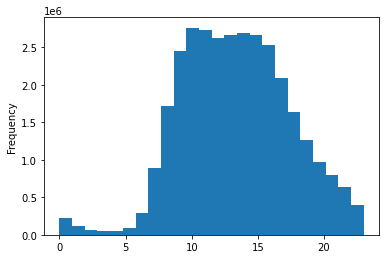

In [5]:
# Creating a histogram of 'order_hour_of_day'

ohod_hist = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram demonstrates that order frequency is significantly low between 0:00 and 6:00, before increasing significantly to the peak where it remains from 9:00 to 16:00. Order frequency then begins gradually decreasing into the morning hours. This is to be expected as most customers order throughout the middle of the day.

In [18]:
# Exporting Histogram

ohod_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

# 3. Create a Bar Chart from the 'loyalty_flag' column

<AxesSubplot:>

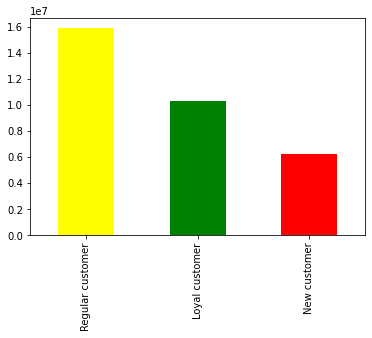

In [6]:
ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar(color=['yellow','green','red'])

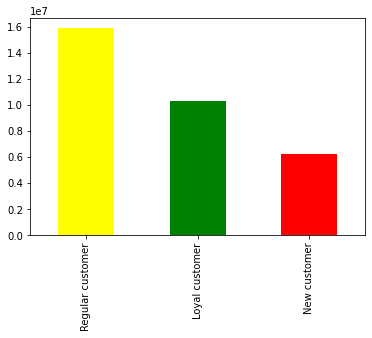

In [7]:
loyalty_bar = ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar(color=['yellow','green','red'])

In [19]:
# Exporting Bar Chart

loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'))

# 4. Create a Line Chart for 'prices' vs. 'order_hour_of_day'

### 4.1 Sampling Data

In [8]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# Creating a subset of 30% of data from ords_prods_custs_merge

small_opcm = ords_prods_custs_merge[~dev]

In [11]:
ords_prods_custs_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,med_days_since_prior_order,regularity_flag,last_name,Gender,State,Age,date_joined,number_of_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8.0,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [12]:
# Creating a subset of just the 'prices' & 'order_hour_of_day' columns

df_30 = small_opcm[['prices','order_hour_of_day']]

### 4.2 Making Line Graph

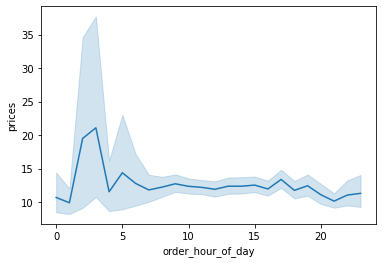

In [13]:
price_ohod_line = sns.lineplot(data = df_30, x = 'order_hour_of_day', y = 'prices')

In [20]:
# Exporting Line Graph

price_ohod_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day_prices.png'))

# 5. Create a Line Chart of Age vs. Number of Dependants

In [14]:
# Creating a subset containing only 'Age' & 'number_of_dependants' column

df_6 = small_opcm[['Age','number_of_dependants']]

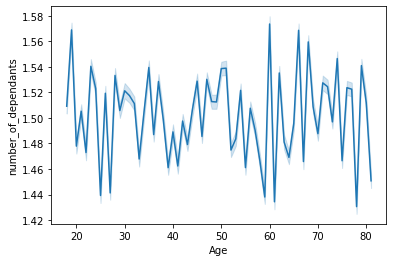

In [15]:
nod_age_line = sns.lineplot(data = df_6, x = 'Age', y = 'number_of_dependants')

#### The line chart shows there is no correlation between 'Age' and 'number_of_dependants'

In [21]:
# Exporting Line Graph

nod_age_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_number_of_dependants.png'))

# 6. Create a scatterplot to compare 'Age' & 'income'

In [16]:
# Creating a subset of small_opcm using only 'Age' & 'income' columns

df_7 = small_opcm[['Age','income']]

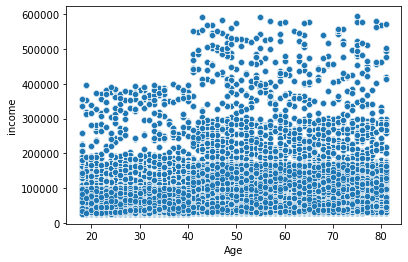

In [22]:
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_7)

#### The scatterplot shows there is a positive correlation between age and income. This relationship exists for incomes under 200,000, but is more significant for incomes over 200,000.

In [23]:
# Exporting Scatterplot

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))